In [1]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

# Removing highly correlated features (tokens)

In [2]:
stop_words = stopwords.words('english')

#adding individual printable characters to list of wtop words so that they get renoved along with the stopwords
stop_words = stop_words + list(string.printable)

In [3]:
lemmatizer = WordNetLemmatizer()

In [4]:
categories= ['misc.forsale', 'sci.electronics', 'talk.religion.misc']
news_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, download_if_missing=True)

In [5]:
news_data_df = pd.DataFrame({'text' : news_data['data'], 'category': news_data.target})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [8]:
news_data_df['cleaned_text'] = news_data_df['text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

In [9]:
news_data_df.head()

,text,category,cleaned_text
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0,steve busop cit wayne edu steve teolis subject...
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0,jks2x holmes acc virginia edu jason schechner ...
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1,wayne uva386 school virginia edu tony wayne su...
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1,lihan ccwf cc utexas edu bruce bostwick subjec...
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0,myoakam ci ohio state edu micah yoakam subject...


In [10]:
tfidf_model = TfidfVectorizer(max_features=20)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,article,com,edu,good,host,know,like,line,new,nntp,one,organization,posting,sale,subject,university,use,would,writes
0,0.719664,0.000000,0.000000,0.191683,0.0,0.124066,0.000000,0.153294,0.066931,0.520927,0.124370,0.0,0.068809,0.120711,0.161624,0.066888,0.255410,0.0,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.219265,0.0,0.000000,0.353598,0.350704,0.153124,0.000000,0.000000,0.0,0.157421,0.000000,0.739523,0.153025,0.292162,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.853563,0.0,0.000000,0.000000,0.000000,0.298044,0.000000,0.000000,0.0,0.306407,0.000000,0.000000,0.297852,0.000000,0.0,0.00000,0.000000
3,0.000000,0.267175,0.255208,0.567867,0.0,0.245034,0.000000,0.302760,0.132190,0.000000,0.245634,0.0,0.135900,0.238407,0.000000,0.132105,0.252221,0.0,0.28648,0.270283
4,0.000000,0.000000,0.000000,0.411807,0.0,0.266541,0.000000,0.000000,0.143793,0.000000,0.267194,0.0,0.147828,0.259333,0.694459,0.143700,0.274358,0.0,0.00000,0.000000


we have taken 20 features, out of these 20 features, we would like remove features which are correlated.

In [11]:
correlation_matrix = tfidf_df.corr()
print(correlation_matrix.shape) # (numfeatures,numfeatures)
correlation_matrix.head()

(20, 20)


,00,article,com,edu,good,host,know,like,line,new,nntp,one,organization,posting,sale,subject,university,use,would,writes
00,1.000000,-0.113080,-0.081874,-0.116847,-0.053495,-0.078405,-0.096597,-0.084413,-0.161674,0.026696,-0.084632,-0.076635,-0.208121,-0.083772,0.054777,-0.188759,-0.105828,-0.076621,-0.094492,-0.127518
article,-0.113080,1.000000,0.125853,0.076146,-0.008246,-0.055519,0.025570,-0.000201,-0.158956,-0.121483,-0.046249,0.029978,-0.201204,-0.038486,-0.197164,-0.189810,-0.158022,0.035890,0.015507,0.572650
com,-0.081874,0.125853,1.000000,-0.471456,-0.016128,-0.178742,-0.036333,-0.037284,-0.110011,-0.071355,-0.175256,-0.037293,-0.084630,-0.168613,-0.131051,-0.114145,-0.368688,-0.035631,-0.010214,0.150258
edu,-0.116847,0.076146,-0.471456,1.000000,-0.098067,0.242610,-0.100041,-0.103703,-0.043210,-0.059893,0.247395,-0.119432,0.023394,0.225912,-0.003604,-0.019058,0.371798,-0.126742,-0.152644,0.017169
good,-0.053495,-0.008246,-0.016128,-0.098067,1.000000,-0.098199,0.025899,0.045106,-0.186943,-0.046803,-0.098198,0.074548,-0.166908,-0.089622,-0.115122,-0.176614,-0.101782,0.068633,0.087909,0.056725


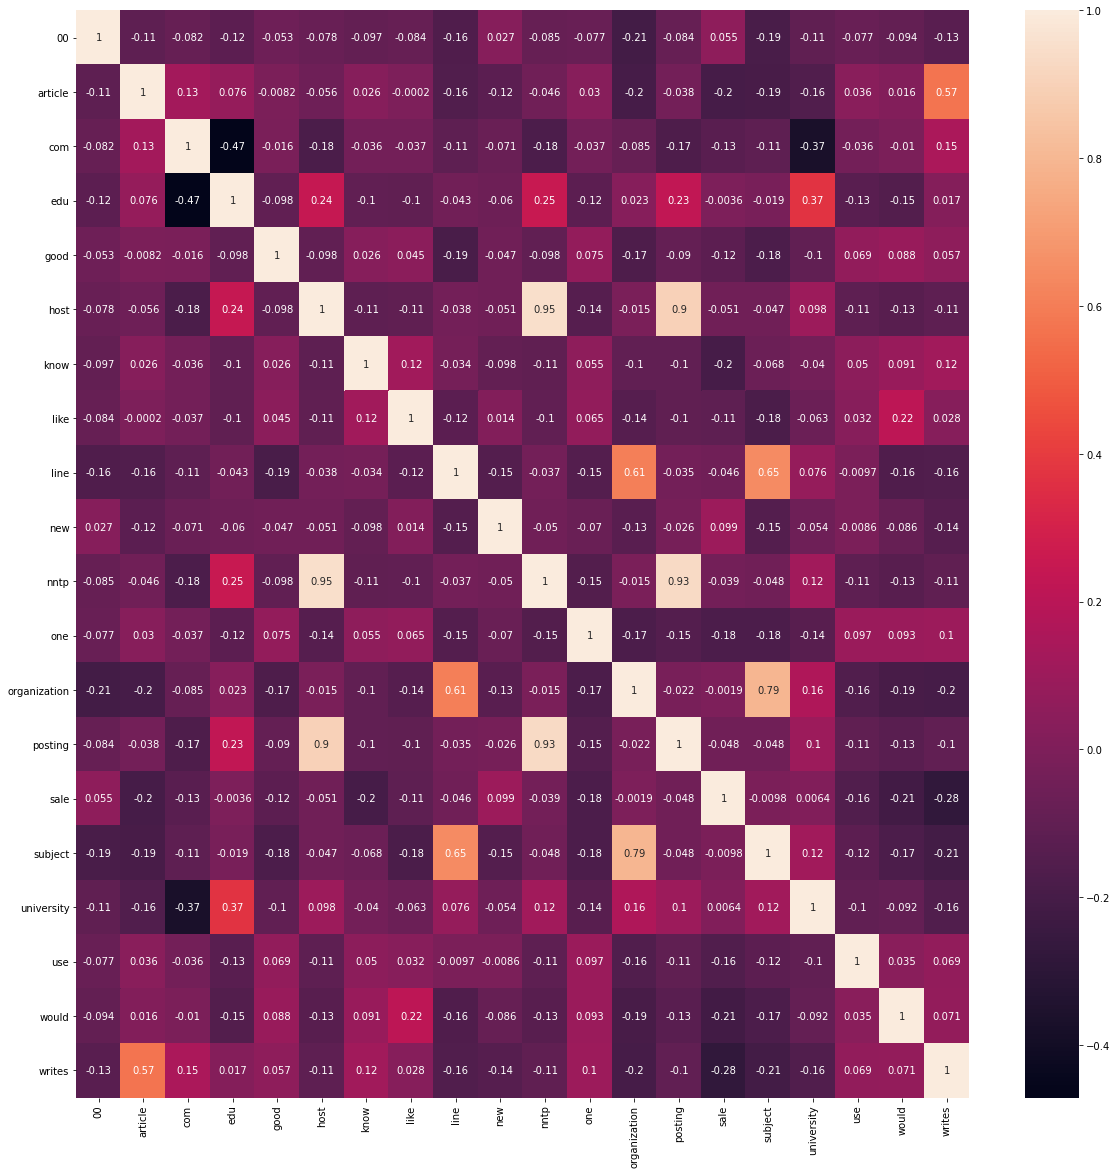

In [12]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation_matrix,annot=True)

The above matrix is symmetrical, that is arr[i][j] = arr[j][i]. Therefore we can remove one traingle of this, and obtain a triangular matrix. <br> 
Then stack the matrix, to get a meaningful representation

np.triu - upper traingle of an array - https://numpy.org/doc/stable/reference/generated/numpy.triu.html

In [13]:
import numpy as np
correlation_matrix_ut = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape)).astype(np.bool))
correlation_matrix_melted = correlation_matrix_ut.stack().reset_index()
correlation_matrix_melted.columns = ['word1', 'word2', 'correlation']
correlation_matrix_melted[(correlation_matrix_melted['word1']!=\
                           correlation_matrix_melted['word2']) & (correlation_matrix_melted['correlation']>.7)]

,word1,word2,correlation
95,host,nntp,0.953828
98,host,posting,0.896666
158,nntp,posting,0.934923
177,organization,subject,0.793946


We have taken all the pairs where correlation is greater than 0.7

Therefore the correlated words are : ('host', 'nntp'), ('host', 'posting'), ('nntp', 'posting'), ('organization', 'subject'). Let's create a new dataframe removing these correlated words.

In [14]:
tfidf_df_without_correlated_word = tfidf_df.drop(['nntp', 'posting', 'organization'], axis = 1)
tfidf_df_without_correlated_word.head()

,00,article,com,edu,good,host,know,like,line,new,one,sale,subject,university,use,would,writes
0,0.719664,0.000000,0.000000,0.191683,0.0,0.124066,0.000000,0.153294,0.066931,0.520927,0.0,0.161624,0.066888,0.255410,0.0,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.219265,0.0,0.000000,0.353598,0.350704,0.153124,0.000000,0.0,0.739523,0.153025,0.292162,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.853563,0.0,0.000000,0.000000,0.000000,0.298044,0.000000,0.0,0.000000,0.297852,0.000000,0.0,0.00000,0.000000
3,0.000000,0.267175,0.255208,0.567867,0.0,0.245034,0.000000,0.302760,0.132190,0.000000,0.0,0.000000,0.132105,0.252221,0.0,0.28648,0.270283
4,0.000000,0.000000,0.000000,0.411807,0.0,0.266541,0.000000,0.000000,0.143793,0.000000,0.0,0.694459,0.143700,0.274358,0.0,0.00000,0.000000


In [15]:
tfidf_df_without_correlated_word.shape

(1553, 17)

Now we are left with 17 features, after removing three correlated features. 

# Dimensioanlity Reduction

Sometimes the number of features we fet from tfidf vectorization may be so large that they don't fit in memory, in these cases we would like to reduce the dimensionality of the features.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(2) # from 17 dimension to 2 dimension

tfidf_pca = pca.fit_transform(tfidf_df_without_correlated_word)

In [17]:
tfidf_pca.shape # it now has 2 features

(1553, 2)

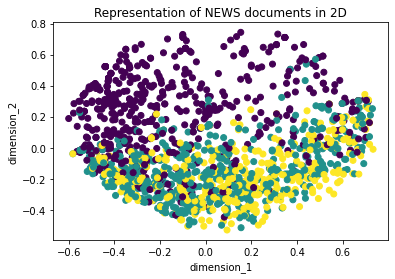

In [18]:
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=news_data_df['category'], cmap='viridis')
plt.xlabel('dimension_1')
plt.ylabel('dimension_2')
plt.title('Representation of NEWS documents in 2D')
plt.show()

## with large number of features

In [19]:
tfidf_model = TfidfVectorizer(max_features=200)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,0.435655,0.0,0.000000,0.0,0.000000,0.127775,0.136811,0.127551,0.133311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113042,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.294937,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.142267,0.106317,0.100306,0.0
4,0.000000,0.0,0.207003,0.0,0.191897,0.182138,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [20]:
pca = PCA(2) # from 200 dimension to 2 dimension

tfidf_pca = pca.fit_transform(tfidf_df)

In [21]:
tfidf_pca.shape

(1553, 2)

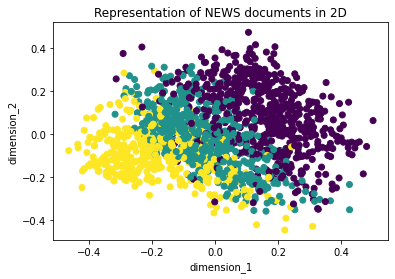

In [22]:
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=news_data_df['category'], cmap='viridis')
plt.xlabel('dimension_1')
plt.ylabel('dimension_2')
plt.title('Representation of NEWS documents in 2D')
plt.show()

We have better clusters when number of features (tokens) are large.